# Hand Written Digit Prediction - Classification Analysis 
---

## Objective

To predict human witten digits, from 0 to 9.

## Input

dataframe representing image


## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_digits

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

## Import Data

In [5]:
df = load_digits()

## Data Visualization

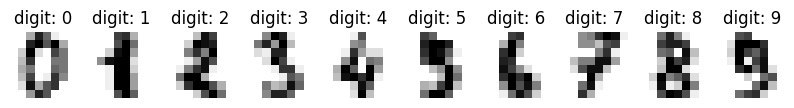

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(10,3))

for ax, img, n in zip(axs, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'digit: {n}')

## Data Preprocessing

In [10]:
df.images.shape

(1797, 8, 8)

In [12]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
# flatenning image, from 2-dim to 1D

n_samples = len(df.images)
data = df.images.reshape([n_samples, -1])  # each 2d image is flattened into a single 1d array od 8*8 elements

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data.shape

(1797, 64)

### Scaling Image data

Some sort of normalization...?

In [16]:
data.min(), data.max()

(0.0, 16.0)

In [20]:
data /= 16

# what if the min value was not zero?
# would have done something like the following?
# data -= data.min()
# data /= data.max()

In [18]:
data.min(), data.max()

(0.0, 1.0)

In [21]:
data[0]

array([0.        , 0.        , 0.0012207 , 0.00317383, 0.00219727,
       0.00024414, 0.        , 0.        , 0.        , 0.        ,
       0.00317383, 0.00366211, 0.00244141, 0.00366211, 0.0012207 ,
       0.        , 0.        , 0.00073242, 0.00366211, 0.00048828,
       0.        , 0.00268555, 0.00195312, 0.        , 0.        ,
       0.00097656, 0.00292969, 0.        , 0.        , 0.00195312,
       0.00195312, 0.        , 0.        , 0.0012207 , 0.00195312,
       0.        , 0.        , 0.00219727, 0.00195312, 0.        ,
       0.        , 0.00097656, 0.00268555, 0.        , 0.00024414,
       0.00292969, 0.00170898, 0.        , 0.        , 0.00048828,
       0.00341797, 0.0012207 , 0.00244141, 0.00292969, 0.        ,
       0.        , 0.        , 0.        , 0.00146484, 0.00317383,
       0.00244141, 0.        , 0.        , 0.        ])

## Define Target Variable (y) and Feature Variables (X)

In [29]:
y = df.target
x = data

## Train Test Split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

## Modeling

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## Prediction

In [36]:
y_predict = rf.predict(x_test)

## **Model Evaluation**

In [39]:
confusion_matrix(y_test, y_predict)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  1, 53,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 48]])

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      1.00      0.98        59
           2       1.00      1.00      1.00        46
           3       1.00      0.95      0.97        58
           4       0.98      1.00      0.99        52
           5       0.89      1.00      0.94        42
           6       1.00      0.96      0.98        50
           7       0.99      1.00      0.99        71
           8       0.95      0.91      0.93        58
           9       1.00      0.94      0.97        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

